<a href="https://colab.research.google.com/github/Neha3103/Fraud_detection/blob/main/fraud_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().values.any()

False

In [ ]:
percent_missing = (data.isnull().sum().sort_values(ascending = False)/len(data))*100
print(percent_missing)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64


In [ ]:
data.duplicated(keep=False).sum()

1854

In [ ]:
data = data.drop_duplicates() 

In [ ]:
# Time statistical summary across fraud and not fraud transactions.
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Not Fraud")
print (data.Time[data.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


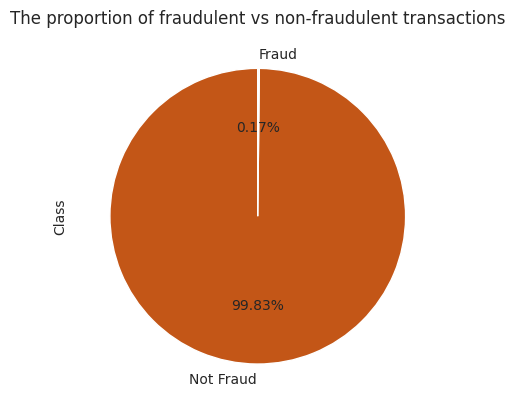

0    283253
1       473
Name: Class, dtype: int64


In [ ]:
plt.title('The proportion of fraudulent vs non-fraudulent transactions')
data['Class'].value_counts().plot(kind='pie', autopct="%.2f%%", labels=['Not Fraud','Fraud'],
                                        startangle = 90, colors = ['#C35617', '#FFDEAD'])
plt.show();
print(data.Class.value_counts())

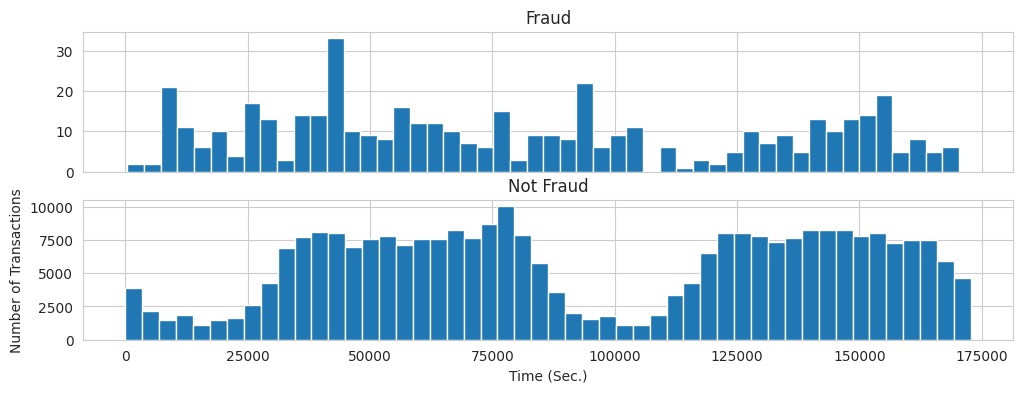

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show();

<ipython-input-85-f708035448d9>:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
<ipython-input-85-f708035448d9>:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
<ipython-input-85-f708035448d9>:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
<ipython-input-85-f708035448d9>:15: UserWar

<Figure size 640x480 with 0 Axes>

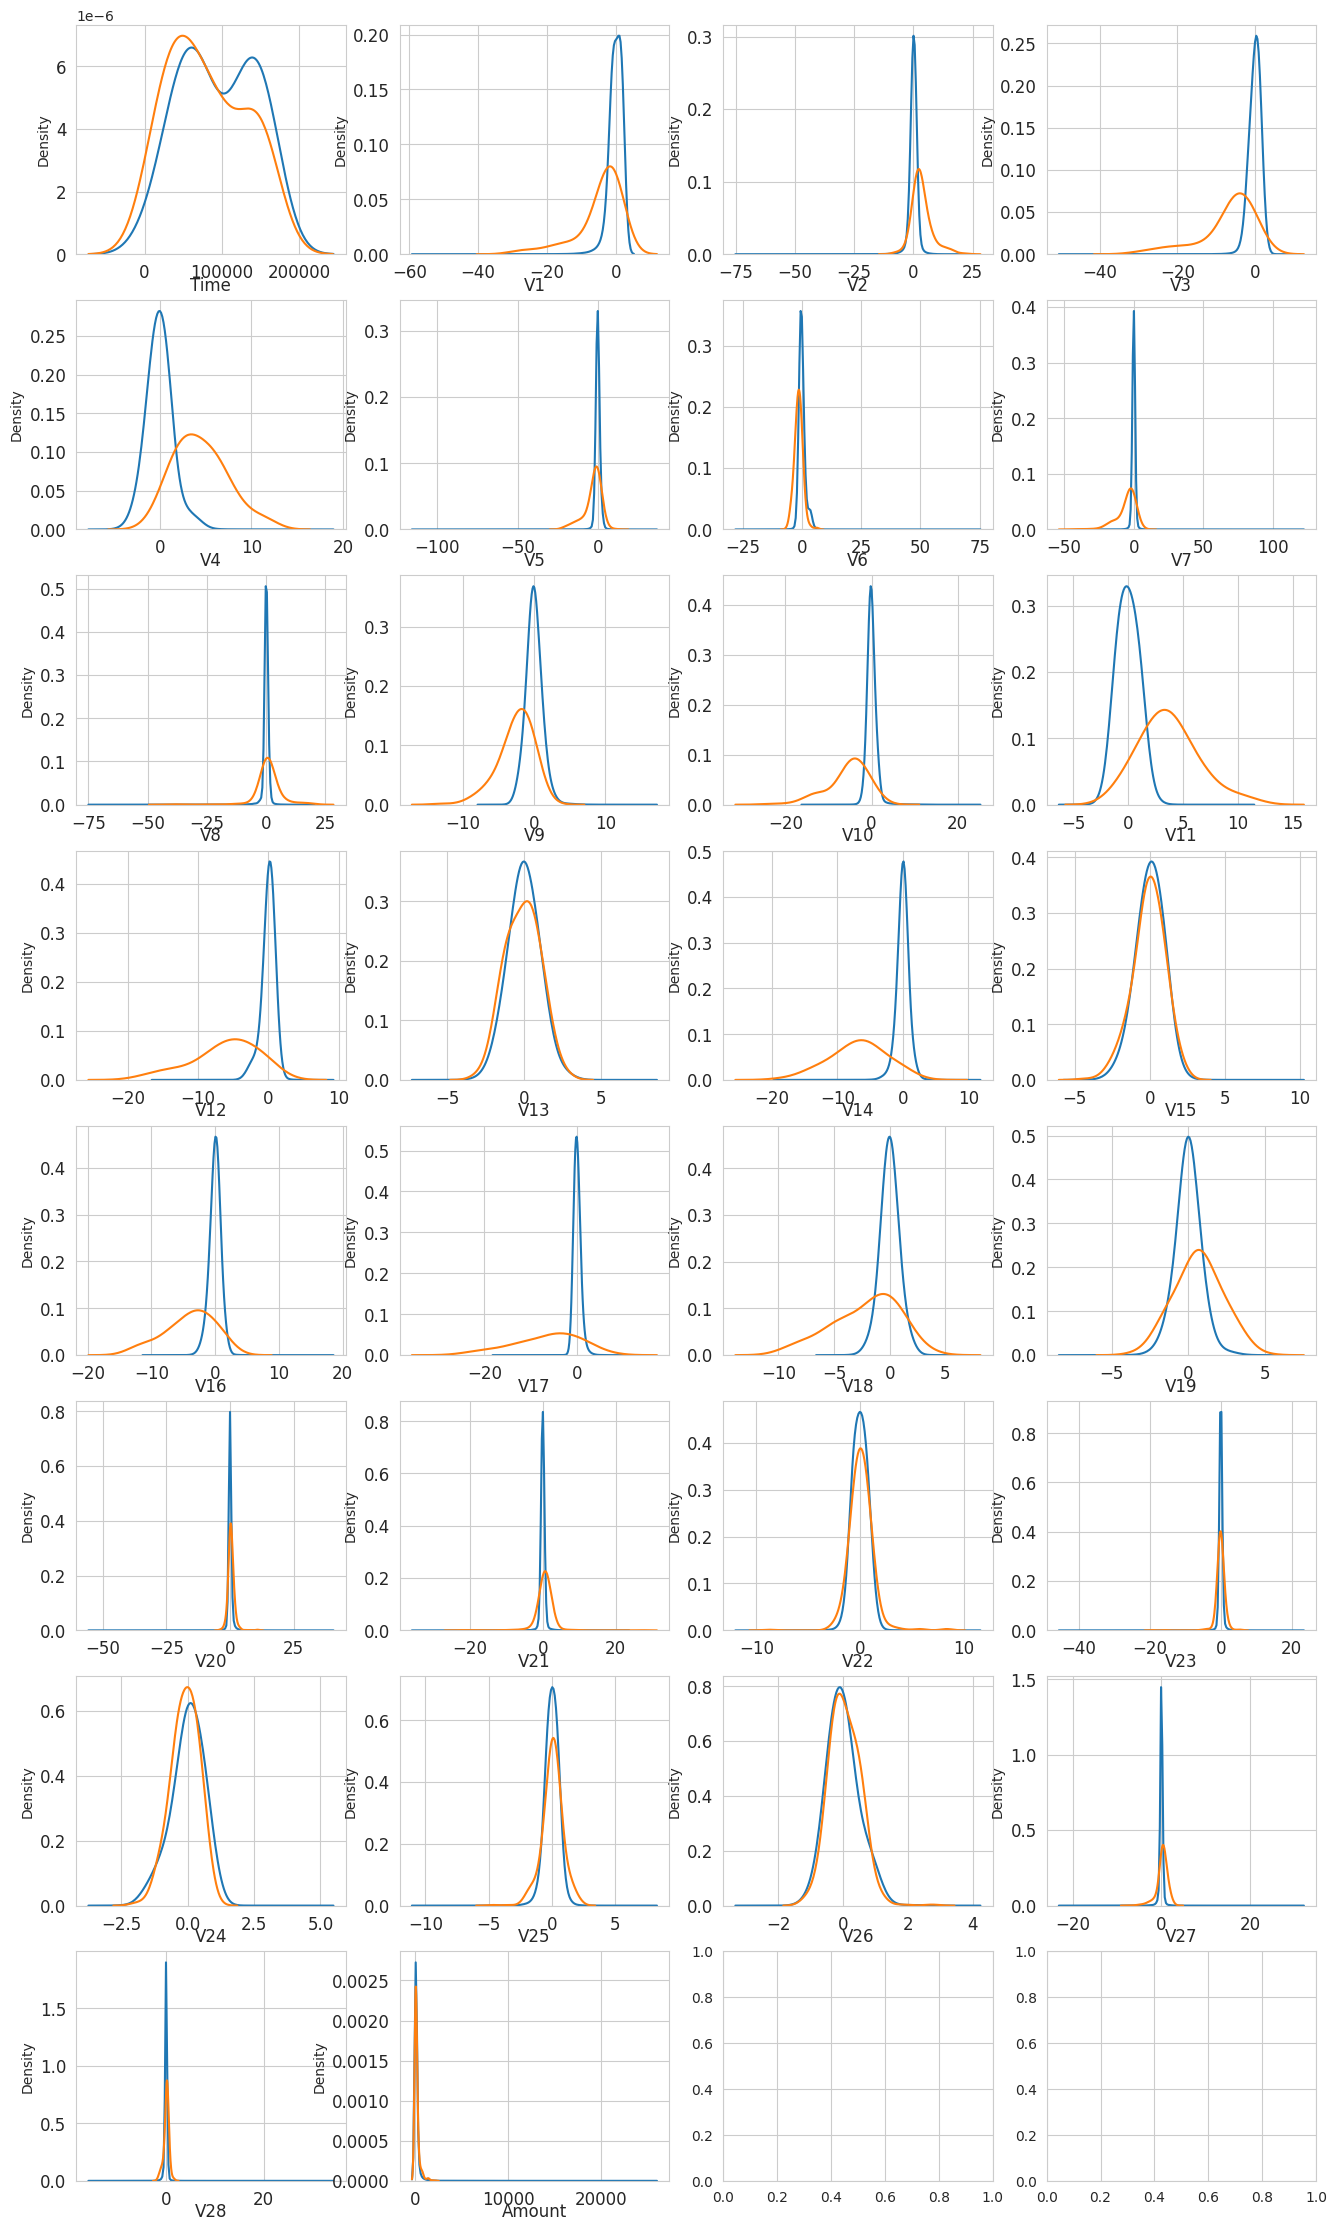

In [ ]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4, figsize=(16,28))

for feature in var[0:-1]:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12, labelpad=-4)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
#DATA TRANSFORMATION

In [ ]:
corr_matrix = data.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='Oranges')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [ ]:
cor_target = data.corrwith(data["Class"])
cor_target.sort_values(axis = 0, ascending = False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
dtype: float64

In [ ]:
#outliers treatment

In [ ]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

<ipython-input-91-1eccdfbde1c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
<ipython-input-91-1eccdfbde1c5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=F

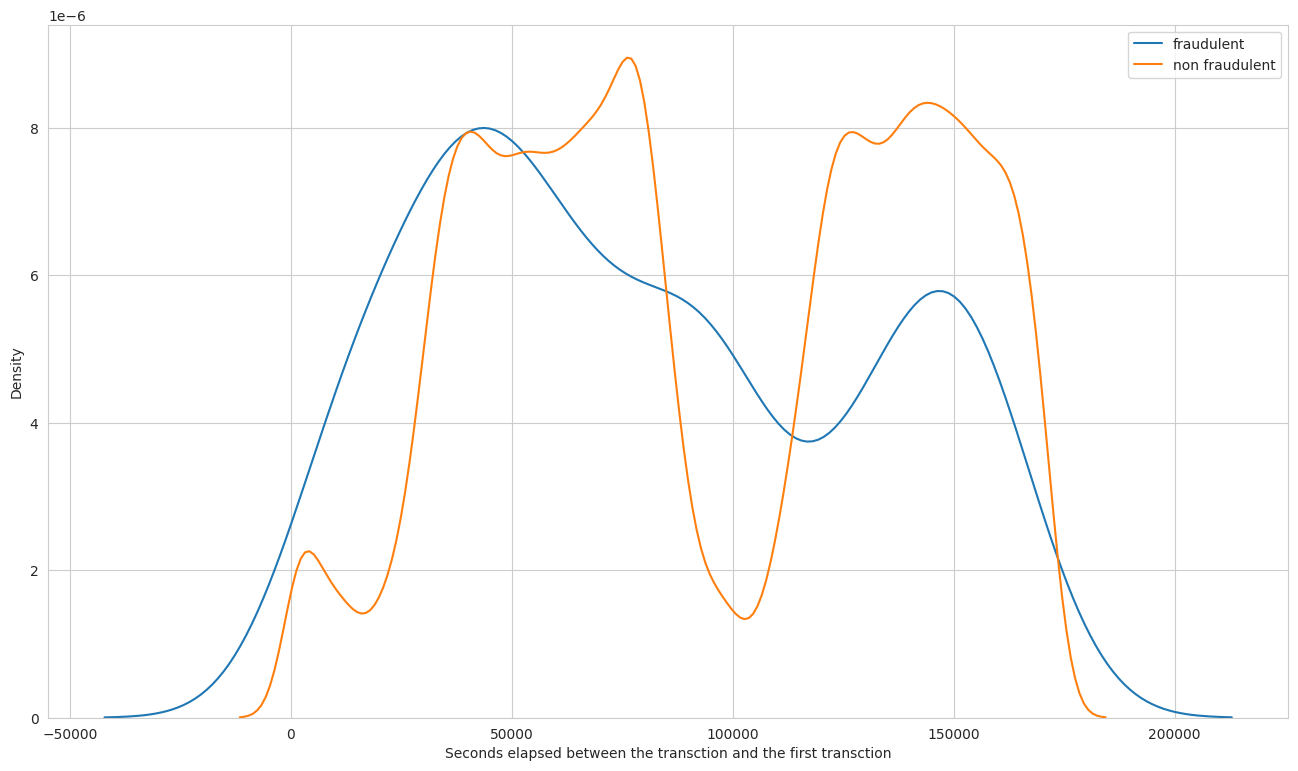

In [ ]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show();

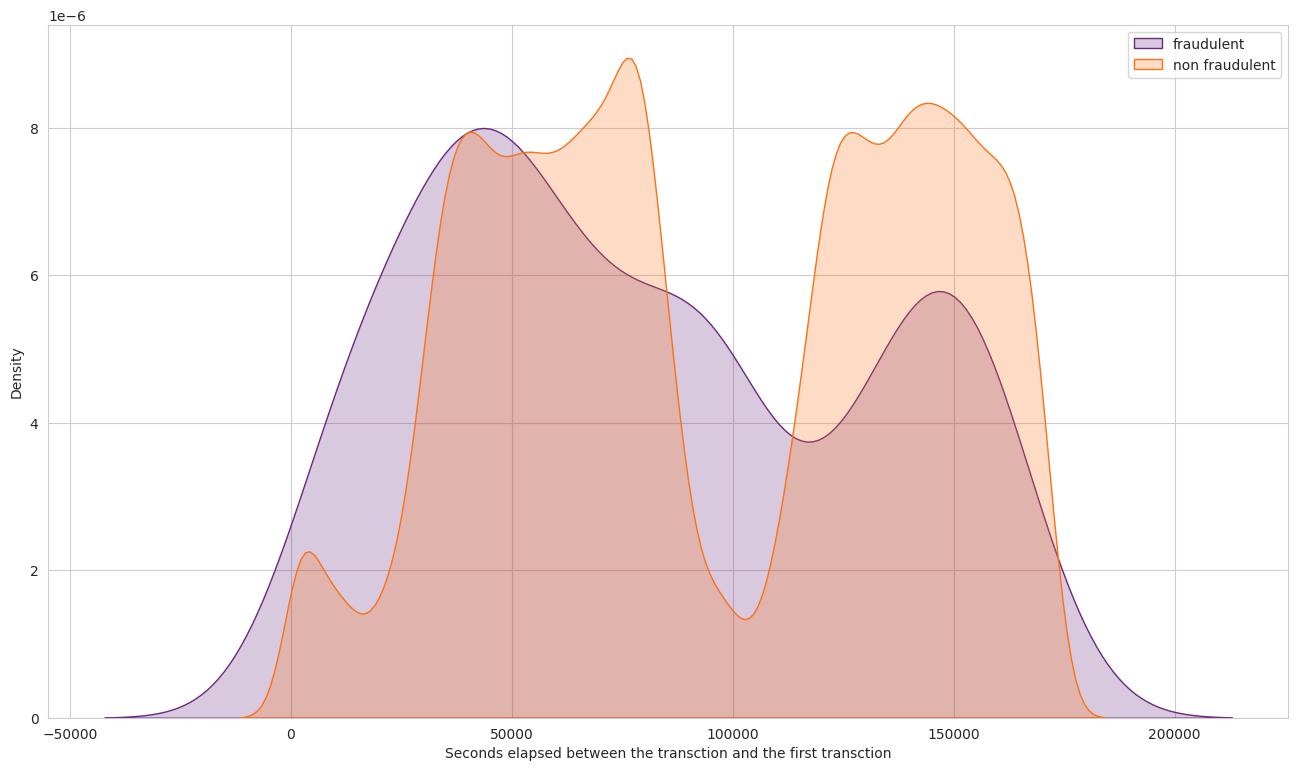

In [ ]:
# Distribution plot
plt.figure(figsize=(16, 9))
ax = sns.kdeplot(data_fraud['Time'], label='fraudulent', fill = True, color = '#6A287E')
ax = sns.kdeplot(data_non_fraud['Time'], label='non fraudulent', fill = True, color = '#F87217')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show();

In [ ]:
# Dropping the Time column
data.drop('Time', axis=1, inplace=True)

<ipython-input-93-4a2719883101>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Time', axis=1, inplace=True)


<ipython-input-94-6bcf8f5e83ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Amount'], label='fraudulent', hist=False)
<ipython-input-94-6bcf8f5e83ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist

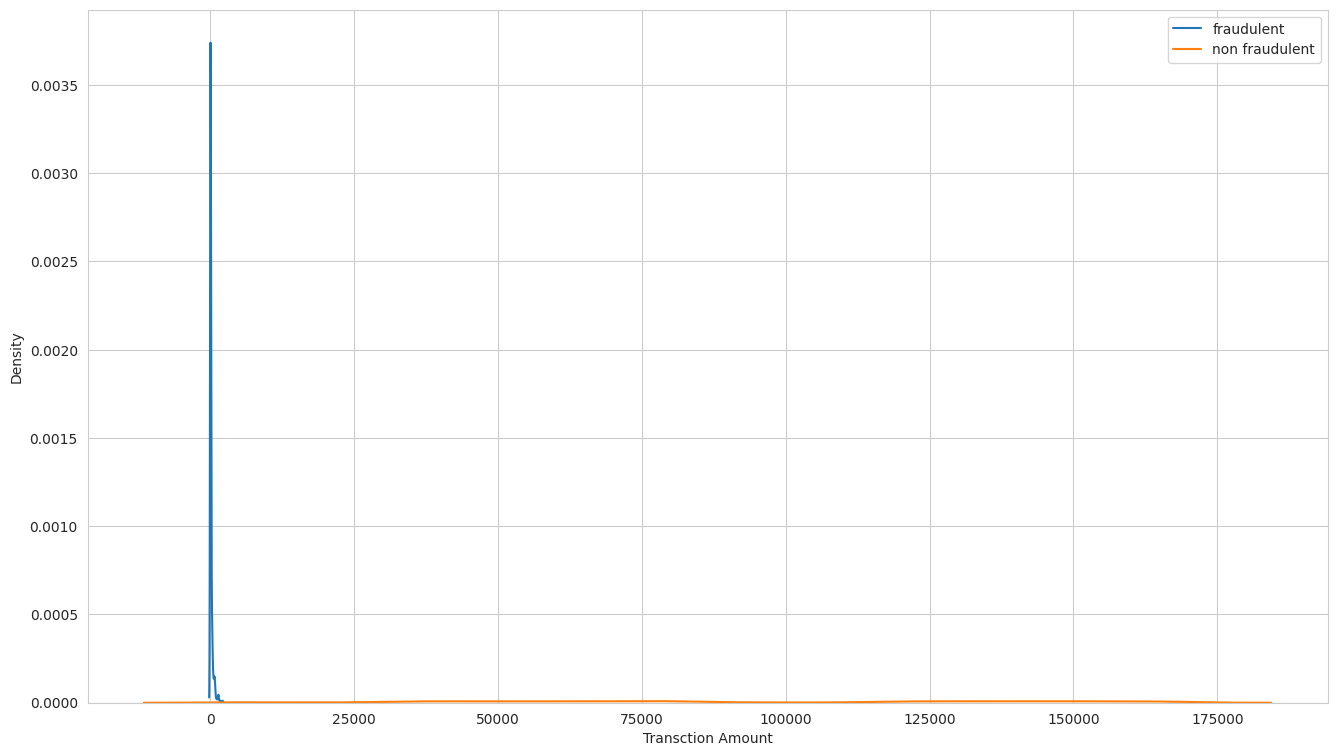

In [ ]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Amount'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel='Transction Amount')
plt.legend()
plt.show();

In [ ]:
#Model on imbalanced data

In [ ]:
#train and test

In [ ]:
# Putting feature variables into X
X = data.drop(['Class'], axis=1)

# Putting target variable to y
y = data['Class']
# Import library
from sklearn.model_selection import train_test_split
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((226980, 29), (226980,))

In [ ]:
X_test.shape, y_test.shape

((56746, 29), (56746,))

In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.909212
265736,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.218631
42801,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.271442
172689,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.325679
179949,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.311060


In [ ]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,-0.349941,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,-0.127114
134356,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,4.728060,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,-0.311733
42637,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,-0.172838,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,-0.168079
882,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,-0.174777,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,-0.336455
263275,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,-0.115561,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,-0.339387


In [ ]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

<ipython-input-110-5dc4ff4a0e53>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-110-5dc4ff4a0e53>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-110-5dc4ff4a0e53>:7: UserWarning: 

`distplot` is a deprecated function and will be remov

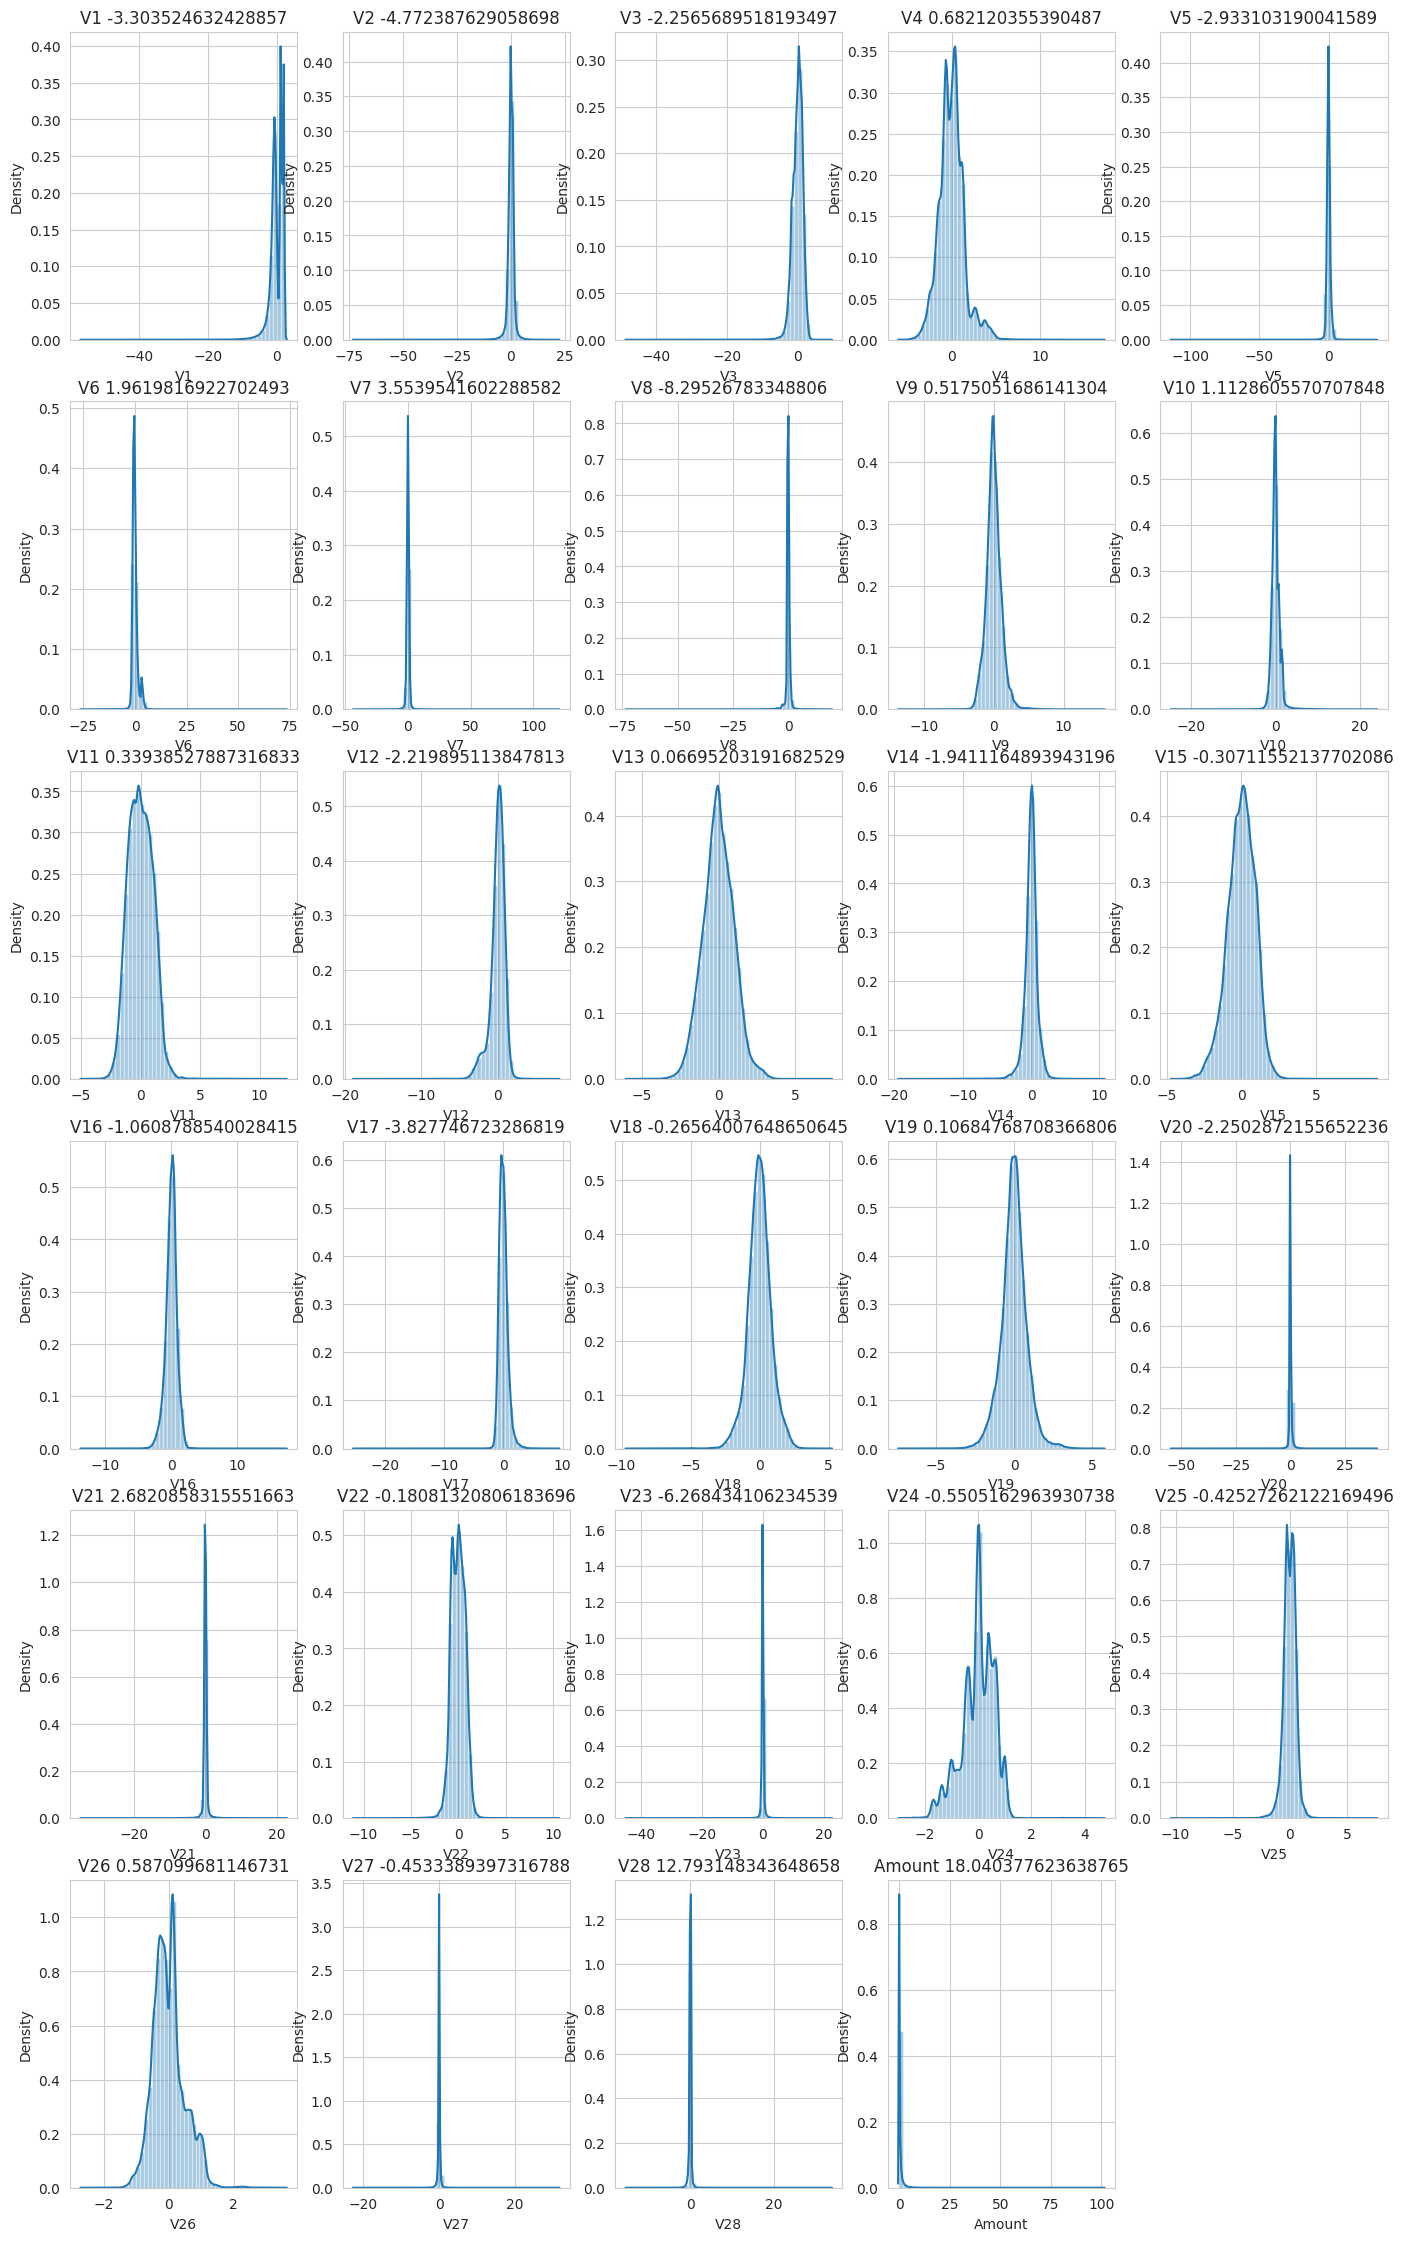

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k = 0
plt.figure(figsize=(17,28))
for col in cols :    
    k = k + 1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

<ipython-input-112-265522908bc0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-112-265522908bc0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-112-265522908bc0>:9: UserWarning: 

`distplot` is a deprecated function and will be remov

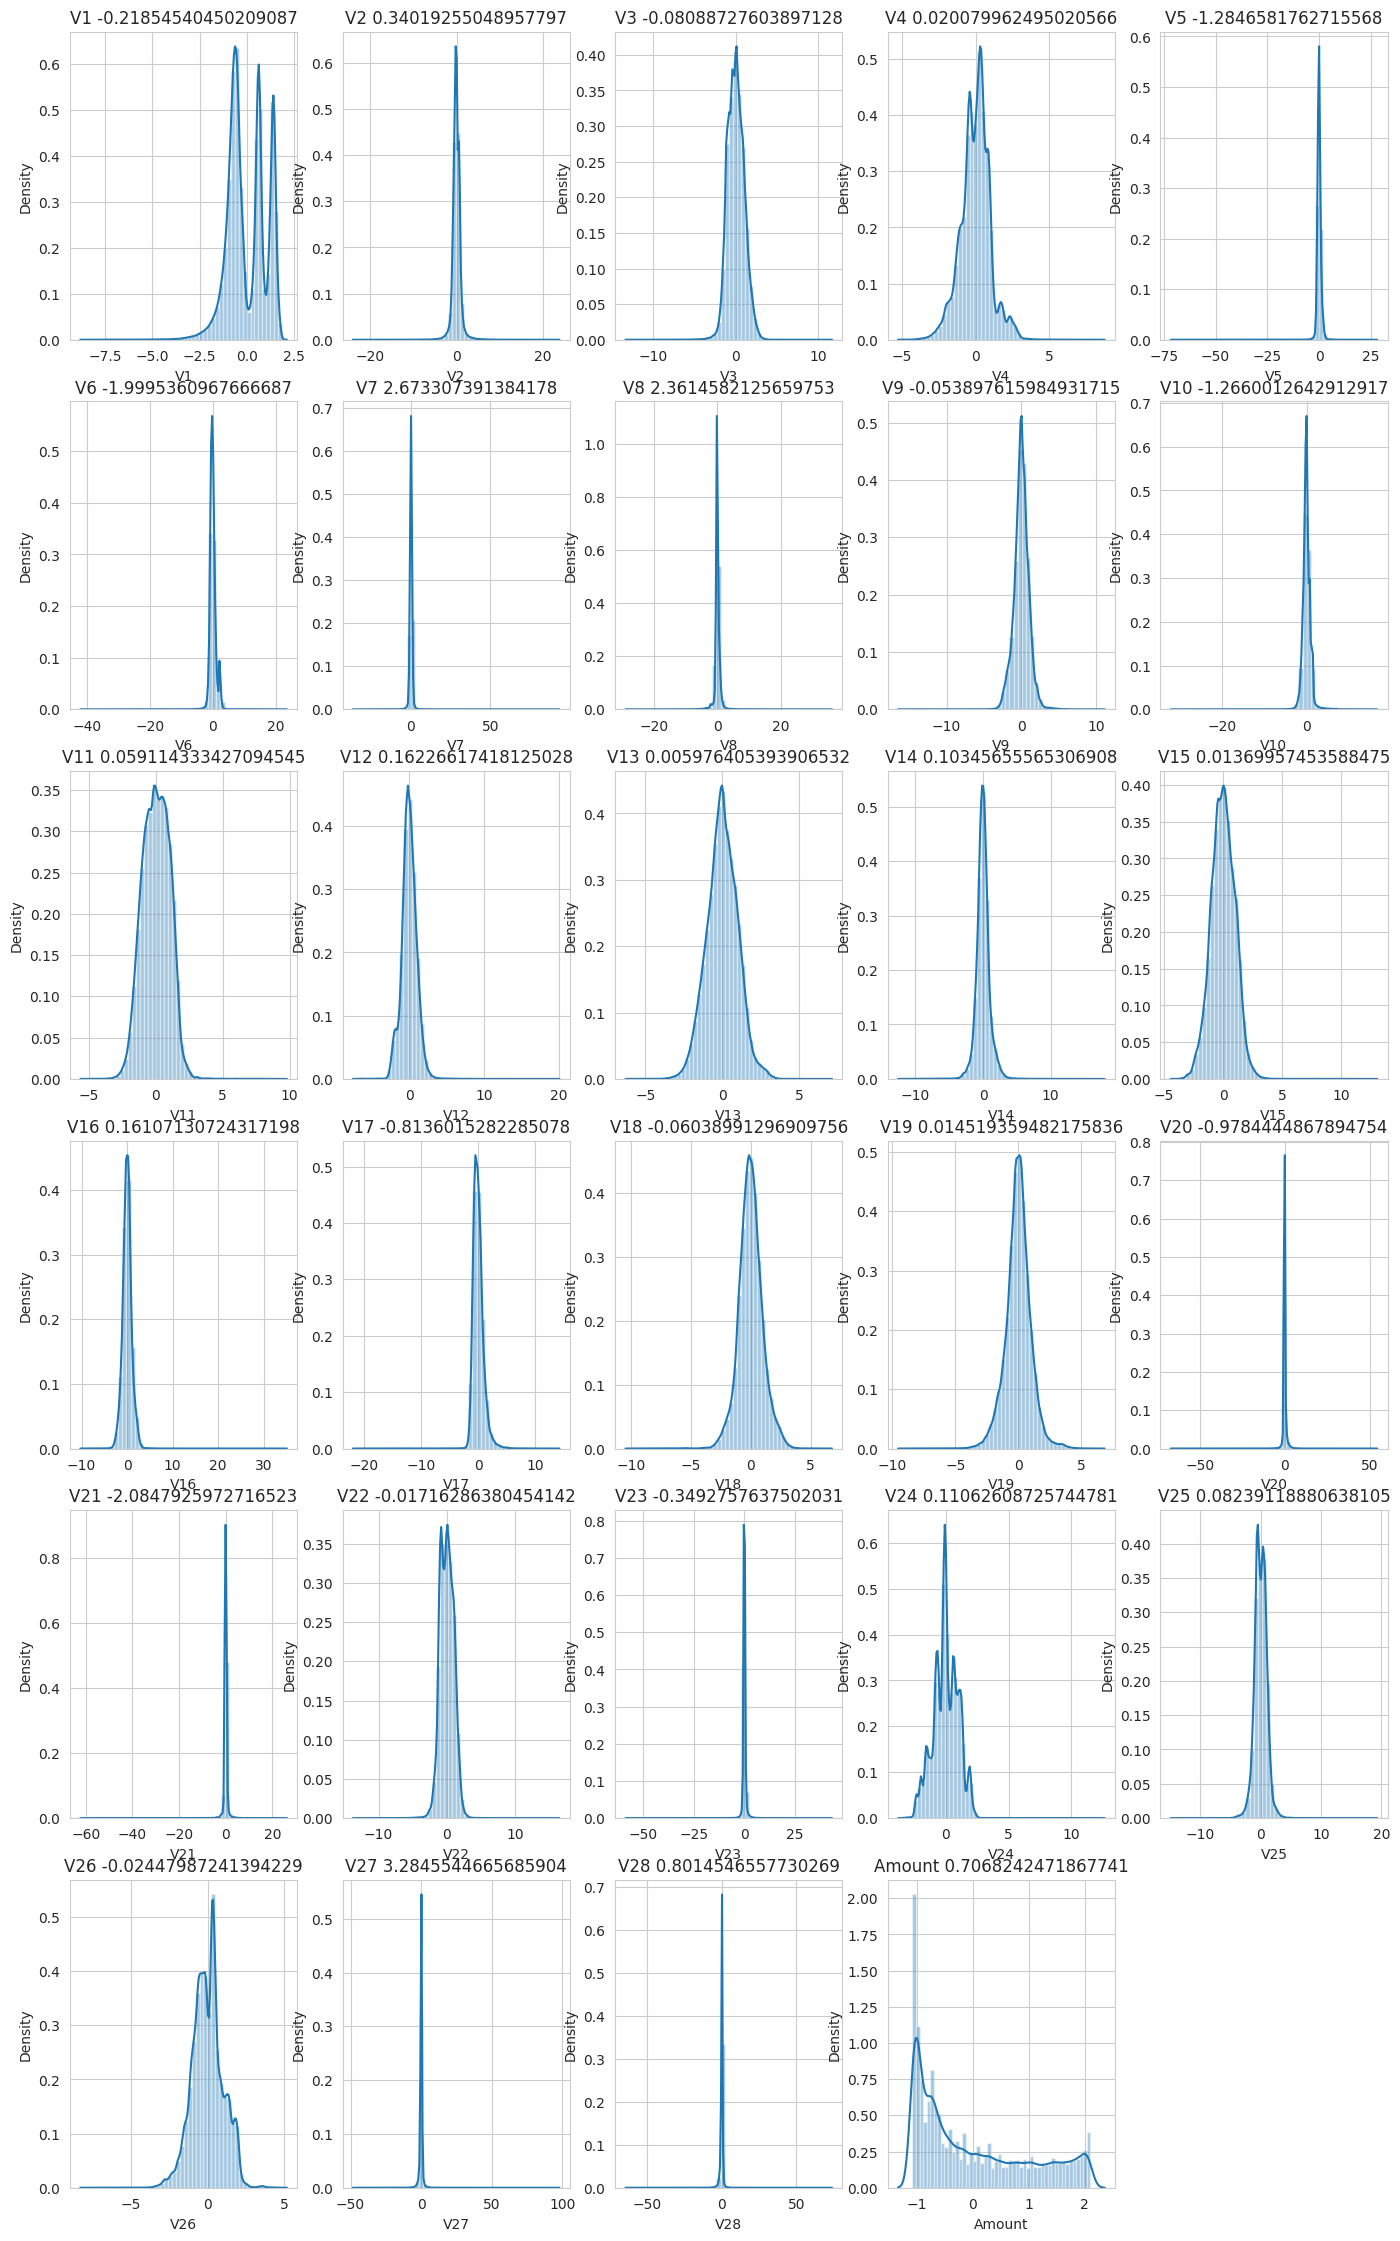

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'], 
                yticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC_AUC(Y, Y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(Y, Y_prob)
    # caculate scores
    model_auc = roc_auc_score(Y, Y_prob)
    # plot roc curve for the model
    plt.figure(figsize=(16, 9))
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' % (model_auc))
    # show axis labels and the legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show(block=False)
    return

In [ ]:
#KNN on training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_train_pred = KNN_model.predict(X_train)
y_test_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_test_pred)

In [ ]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train, y_train_pred))

Recall score: 0.7990
Precision score: 0.9533
F1-Score: 0.8693
Accuracy score: 0.9996
AUC: 0.8994


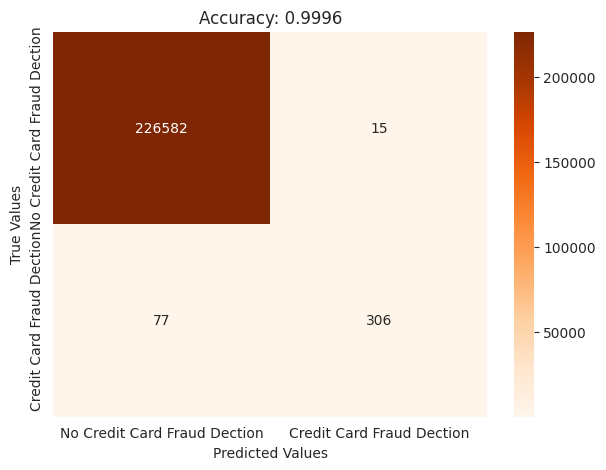



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.95      0.80      0.87       383

    accuracy                           1.00    226980
   macro avg       0.98      0.90      0.93    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
Visualize_confusion_matrix(y_train, y_train_pred)

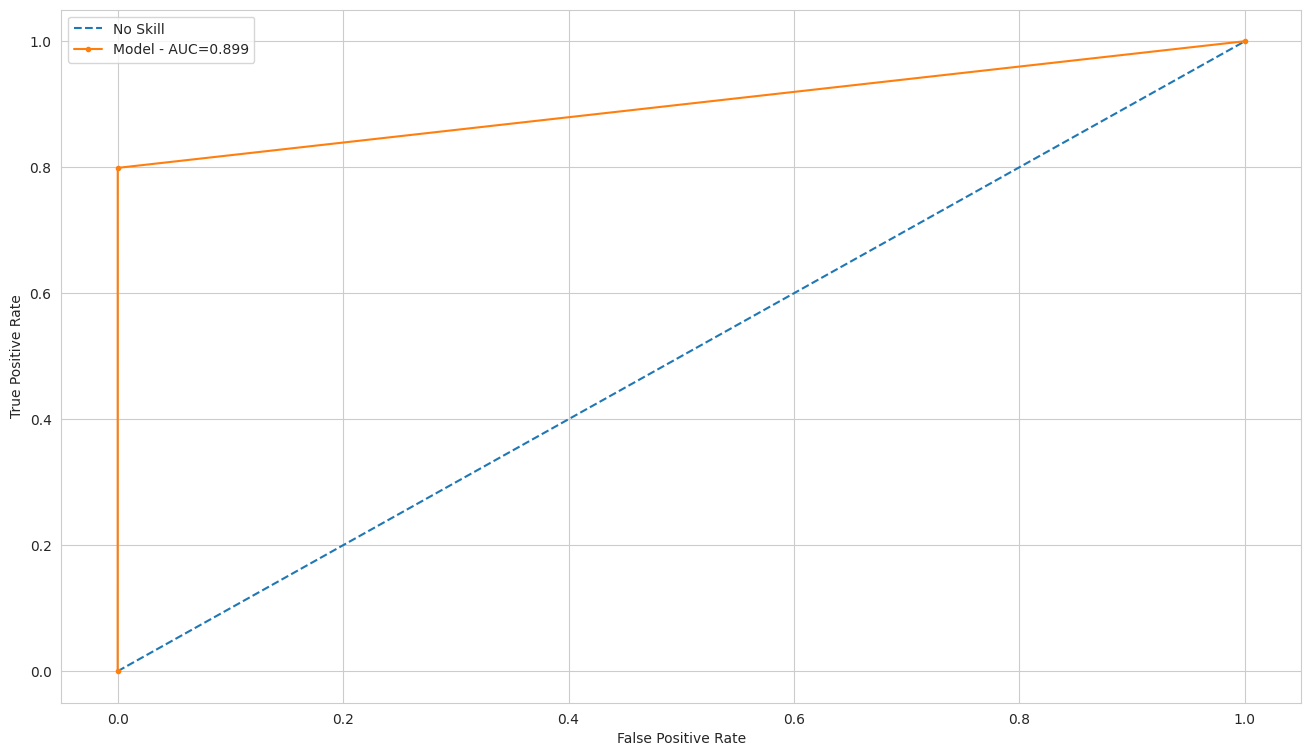

In [ ]:
ROC_AUC(y_train, y_train_pred)

In [ ]:
#Training the KNN Model on the Testing set

In [ ]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.7000
Precision score: 0.9692
F1-Score: 0.8129
Accuracy score: 0.9995
AUC: 0.8500


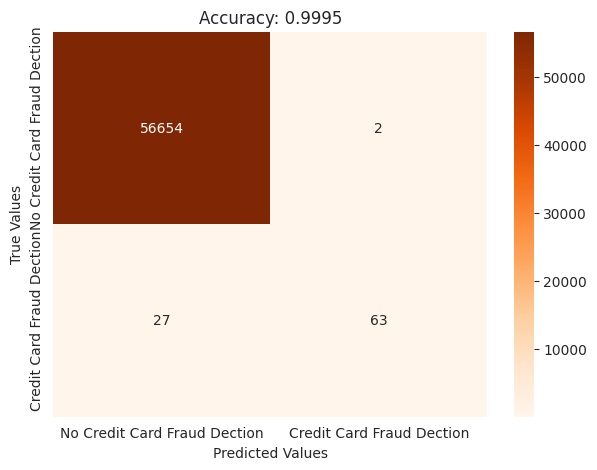



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.70      0.81        90

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

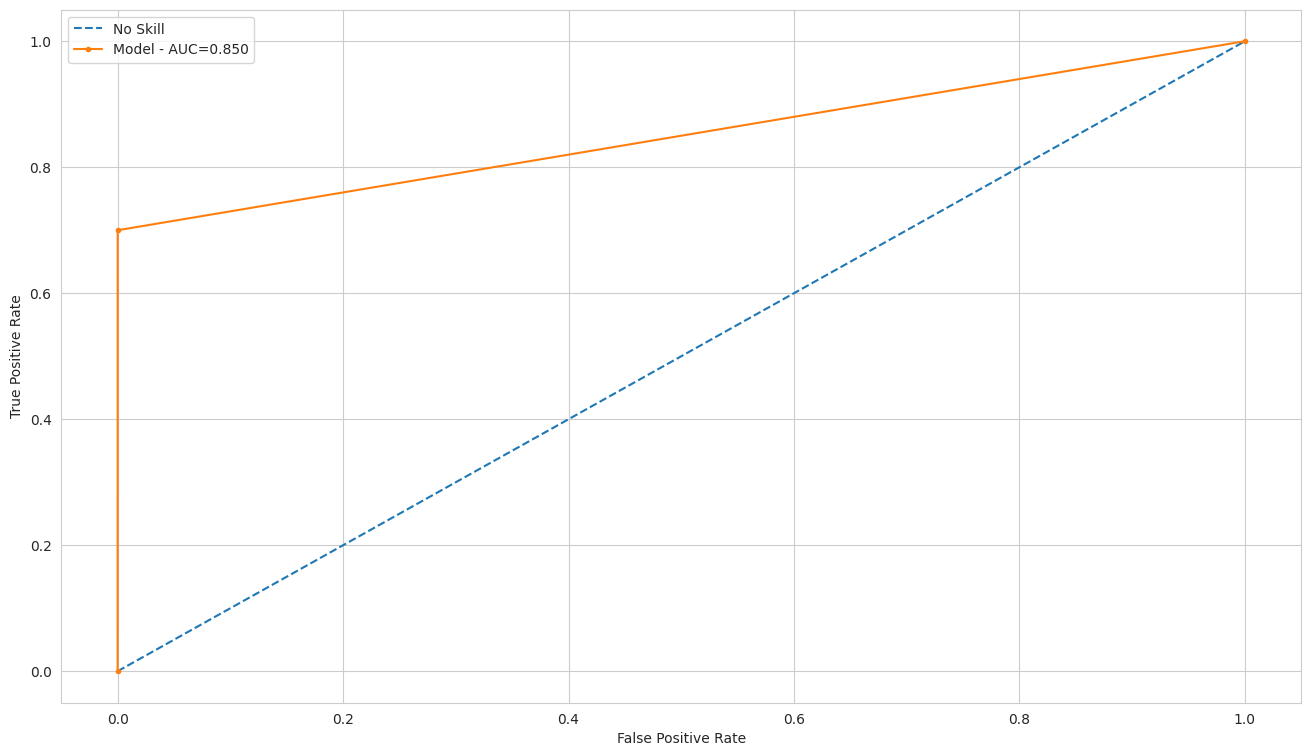

In [ ]:
ROC_AUC(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

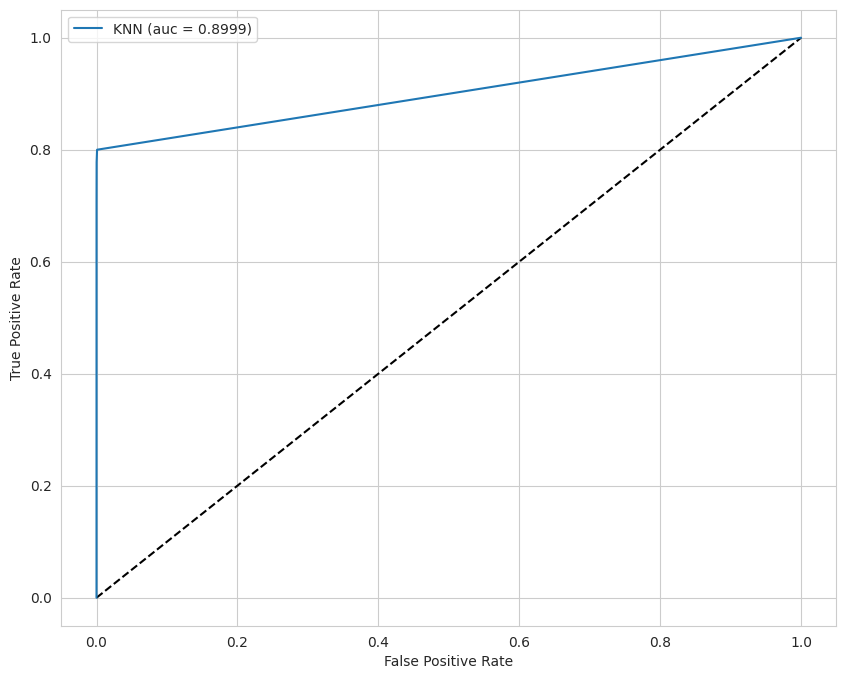

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.4f)' % auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [ ]:
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))

Accuracy score: 0.9995
